#### Prueba Técnica Científico/a de Datos
##### PLAN PARA EL DESARROLLO DE MODELO

1. Explorar y Analizar los Datos
2. Preprocesamiento de Datos
3. Dividir en Conjuntos de Entrenamiento y Prueba
4. Entrenar y evaluar el Modelos

Desarrollado por: Juan Manuel Peñaloza / Fecha: Abril 27 de 2025

#### 1. Explorar y Analizar los Datos

In [48]:
#importar las libnerias que se van a uitilizar para explorar y analizar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from unidecode import unidecode
from typing import Union

import scipy.stats as stats
from scipy.stats import chi2_contingency

#### Base de datos: Test

In [49]:
# Lectura de la base de datos
test = pd.read_csv("test.csv",encoding="latin1",sep=';')
train = pd.read_csv("train.csv",encoding="latin1",sep=';')

In [50]:
# descripción de la base de datos
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5001 non-null   int64  
 1   Fecha.Expedicion    5001 non-null   object 
 2   Cancelacion         137 non-null    object 
 3   Gestionable         137 non-null    object 
 4   TIPO                137 non-null    object 
 5   ANO_MES             137 non-null    float64
 6   Fecha.Proceso       5001 non-null   object 
 7   Disponible.Avances  5001 non-null   object 
 8   Limite.Avances      5001 non-null   object 
 9   Total.Intereses     5001 non-null   object 
 10  Saldos.Mes.Ant      5001 non-null   object 
 11  Pagos.Mes.Ant       5001 non-null   object 
 12  Vtas.Mes.Ant        5001 non-null   object 
 13  Edad.Mora           5001 non-null   int64  
 14  Limite.Cupo         5001 non-null   object 
 15  Pago.del.Mes        5001 non-null   object 
 16  Pago.M

In [51]:
test.head()

,id,Fecha.Expedicion,Cancelacion,Gestionable,TIPO,ANO_MES,Fecha.Proceso,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo
0,50002,14/06/2007,NaN,NaN,NaN,NaN,1/04/2018,150 000.00,150 000.00,0,0,0,0,0,500 000.00,0,0,0,0,0
1,50003,18/09/2007,NaN,NaN,NaN,NaN,1/04/2018,150 000.00,150 000.00,0,0,0,0,0,500 000.00,0,0,0,0,0
2,50004,12/04/2007,NaN,NaN,NaN,NaN,1/04/2018,540 000.00,540 000.00,0,0,0,0,0,1 350 000.00,0,0,0,0,0
3,50005,17/11/2006,NaN,NaN,NaN,NaN,1/04/2018,252 000.00,252 000.00,0,0,0,0,0,840 000.00,0,0,0,0,0
4,50006,31/01/2007,NaN,NaN,NaN,NaN,1/04/2018,760 000.00,760 000.00,0,0,0,0,0,1 900 000.00,0,0,0,0,0


### Análisis Base de datos TRAIN 

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50001 non-null  int64  
 1   Fecha.Expedicion    50001 non-null  object 
 2   Cancelacion         1412 non-null   object 
 3   Gestionable         1412 non-null   object 
 4   Retencion           1412 non-null   object 
 5   TIPO                1412 non-null   object 
 6   ANO_MES             1412 non-null   float64
 7   Target              50001 non-null  int64  
 8   Fecha.Proceso       50001 non-null  object 
 9   Disponible.Avances  50001 non-null  object 
 10  Limite.Avances      50001 non-null  object 
 11  Total.Intereses     50001 non-null  object 
 12  Saldos.Mes.Ant      50001 non-null  object 
 13  Pagos.Mes.Ant       50001 non-null  object 
 14  Vtas.Mes.Ant        50001 non-null  object 
 15  Edad.Mora           50001 non-null  int64  
 16  Limi

In [53]:
#Se extrae una vizualización aleatoria del Data Set TRAIN
train.sample(n=7, random_state=42)

,id,Fecha.Expedicion,Cancelacion,Gestionable,Retencion,TIPO,ANO_MES,Target,Fecha.Proceso,Disponible.Avances,...,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo
33553,33554,28/04/2015,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,285 000.00,...,0,0,0,0,950 000.00,0,0,0,0,0
9427,9428,2/12/2010,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,0,...,1 964 244.51,0,0,30,850 000.00,0,1 142 314.00,0,220 061.00,1 964 244.51
199,200,17/10/2009,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,0,...,2 253 988.60,0,0,2400,1 500 000.00,0,2 253 988.60,810 500.83,42 000.00,2 253 988.60
12447,12448,6/04/2011,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,150 000.00,...,0,0,0,0,500 000.00,0,0,0,0,0
39489,39490,7/06/2016,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,1 620 000.00,...,0,0,0,0,4 050 000.00,0,0,0,0,0
42725,42726,29/08/2008,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,0,...,1 868 876.36,0,0,3300,750 000.00,0,1 868 876.36,673 905.73,15 000.00,1 868 876.36
10822,10823,17/08/2010,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,120 000.00,...,0,0,0,0,400 000.00,0,0,0,0,0


In [54]:
# se extraen los nombres de las variables para ser llamadas posteriormente ya que se va a analizar una por una
var_train = train.columns.tolist()
print(var_train)

['id', 'Fecha.Expedicion', 'Cancelacion', 'Gestionable', 'Retencion', 'TIPO', 'ANO_MES', 'Target', 'Fecha.Proceso', 'Disponible.Avances', 'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo']


In [55]:
# Funcion para limpiar las tildes y espacios de las variables de texto

def limpiar_texto(texto):
    if pd.isna(texto):
        return texto
    # Pasar a minúsculas
    texto = texto.lower()
    # Quitar tildes
    texto = unidecode(texto)
    # Quitar caracteres especiales (dejar solo letras y espacios)
    texto = re.sub(r'[^a-z\s]', ' ', texto)
    # Quitar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [56]:
#Analisis de las variables


variable=var_train[2]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1'] =train[variable].apply(limpiar_texto)
train[variable+'_1'].value_counts(dropna=False)

#print(train.groupby(variable+'_1')['Target'].mean().reset_index())

resultado = (
    train.groupby(variable+'_1', dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 


Analisis de la variable: Cancelacion

                                        Cancelacion_1  Pct_Target  conteo
0                   amparada no desea recibir el cupo     100.000     152
1             amparada no le han entregado la tarjeta     100.000       1
2                         amparada pasa a ser titular     100.000      13
3   capacidad de endeudamiento para pago a otro cr...     100.000     303
4   capacidad de endeudamiento para pago a otro cr...     100.000      24
5                                   capacidad de pago     100.000      31
6                                     cuota de manejo     100.000     271
7                  inconforme con el modo de cobranza     100.000       4
8   inconformidad con el cobro de seguro de vida y...     100.000       1
9               inconformidad con el cobro de seguros     100.000      19
10  inconformidad con el descuento del subsidio fa...     100.000      12
11                         inconformidad del producto     100.000     140


In [57]:
#Analisis de las variables

variable=var_train[3]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1'] =train[variable].apply(limpiar_texto)
train[variable+'_1'].value_counts(dropna=False)

resultado = (
    train.groupby(variable+'_1', dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Gestionable

    Gestionable_1  Pct_Target  conteo
0     gestionable     100.000     752
1  no gestionable     100.000     660
2             NaN       0.000   48589


In [58]:
#Analisis de las variables

variable=var_train[4]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1'] =train[variable].apply(limpiar_texto)
train[variable+'_1'].value_counts(dropna=False)

resultado = (
    train.groupby(variable+'_1', dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Retencion

   Retencion_1  Pct_Target  conteo
0     efectiva     100.000     173
1  no efectiva     100.000    1239
2          NaN       0.000   48589


In [59]:
#Analisis de las variables

variable=var_train[5]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1'] =train[variable].apply(limpiar_texto)
train[variable+'_1'].value_counts(dropna=False)

resultado = (
    train.groupby(variable+'_1', dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: TIPO

   TIPO_1  Pct_Target  conteo
0  amparo     100.000     306
1    cupo     100.000    1106
2     NaN       0.000   48589


In [60]:
#Analisis de las variables
variable=var_train[6]
print('Analisis de la variable: '+variable+'\n')

train[variable].value_counts(dropna=False) 

resultado = (
    train.groupby(variable, dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: ANO_MES

      ANO_MES  Pct_Target  conteo
0  201701.000     100.000     157
1  201702.000     100.000      98
2  201703.000     100.000      89
3  201704.000     100.000      81
4  201705.000     100.000      95
5  201706.000     100.000      86
6  201707.000     100.000     116
7  201708.000     100.000     102
8  201709.000     100.000      83
9  201710.000     100.000      84
10 201711.000     100.000      92
11 201712.000     100.000     181
12 201802.000     100.000      71
13 201803.000     100.000      77
14        NaN       0.000   48589


In [61]:
#Analisis de las variables
variable=var_train[7]
print('Analisis de la variable: '+variable+'\n')

print(train[variable].value_counts(dropna=False)) 

print((1412/48589)*100)

#El porcentaje de la variable Target es 2.9%.

Analisis de la variable: Target

Target
0    48589
1     1412
Name: count, dtype: int64
2.9060075325691


In [62]:
#Analisis de las variables
variable=var_train[8]
print('Analisis de la variable: '+variable+'\n')

train[variable].value_counts(dropna=False) 

resultado = (
    train.groupby(variable, dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado)       

Analisis de la variable: Fecha.Proceso

   Fecha.Proceso  Pct_Target  conteo
0      1/01/2017     100.000     157
1      1/02/2017     100.000      98
2      1/02/2018     100.000      71
3      1/03/2017     100.000      89
4      1/03/2018     100.000      77
5      1/04/2017     100.000      81
6      1/04/2018       0.000   48589
7      1/05/2017     100.000      95
8      1/06/2017     100.000      86
9      1/07/2017     100.000     116
10     1/08/2017     100.000     102
11     1/09/2017     100.000      83
12     1/10/2017     100.000      84
13     1/11/2017     100.000      92
14     1/12/2017     100.000      92
15    31/12/2017     100.000      89


In [63]:
#se define una función para limpiar las variables numericas de la base de datos

def limpiar_a_float(serie: pd.Series) -> pd.Series:
    """
    Limpia una serie de texto y la convierte a float.
    - Quita espacios iniciales/finales e internos
    - Cambia comas por puntos decimales
    - Elimina caracteres que no sean números, punto o signo
    - Maneja valores nulos correctamente
    """
    return (
        serie
        .astype(str)  # Convertir todo a string temporalmente
        .str.strip()  # Quitar espacios iniciales y finales
        .str.replace(" ", "", regex=False)  # Quitar espacios internos
        .str.replace(",", ".", regex=False)  # Coma -> punto decimal
        .apply(lambda x: re.sub(r"[^0-9\.\-]", "", x))  # Solo números, punto y signo
        .replace({"": None, "nan": None})  # Vacíos o "nan" -> NaN real
        .astype(float)  # Convertir a float
    )

In [64]:
#Analisis de las variables
variable=var_train[9]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print(train[[variable+'_1',variable]].sample(n=15, random_state=42))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')
print(train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target'].mean().mul(100).reset_index())   

Analisis de la variable: Disponible.Avances

       Disponible.Avances_1 Disponible.Avances
33553            285000.000         285 000.00
9427                  0.000                  0
199                   0.000                  0
12447            150000.000         150 000.00
39489           1620000.000       1 620 000.00
42725                 0.000                  0
10822            120000.000         120 000.00
49499             45000.000          45 000.00
4144              90000.000          90 000.00
36958                 0.000                  0
43107             21817.920          21 817.92
38695            760000.000         760 000.00
6188            1258800.000       1 258 800.00
1414             180000.000         180 000.00
18471            132000.000         132 000.00

Analisis Univariado
count      50001.000
mean      380979.561
std       707450.156
min            0.000
25%        67929.000
50%       165000.000
75%       389392.000
max     16500000.000
Name: Disponib

In [65]:
#Analisis de las variables
variable=var_train[10]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=42))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 



Analisis de la variable: Limite.Avances

Revisión de la calidad de la transformación de los datos

       Limite.Avances_1 Limite.Avances
33553        285000.000     285 000.00
9427         255000.000     255 000.00
199          600000.000     600 000.00
12447        150000.000     150 000.00
39489       1620000.000   1 620 000.00
42725        225000.000     225 000.00
10822        120000.000     120 000.00
49499         45000.000      45 000.00
4144          90000.000      90 000.00
36958        150000.000     150 000.00
43107        261000.000     261 000.00
38695        880000.000     880 000.00
6188        1258800.000   1 258 800.00
1414         180000.000     180 000.00
18471        132000.000     132 000.00

Analisis Univariado
count      50001.000
mean      476357.691
std       732454.624
min        45000.000
25%       150000.000
50%       225000.000
75%       512000.000
max     16500000.000
Name: Limite.Avances_1, dtype: float64


      Limite.Avances_cat_1  promedio_pct  conte

In [66]:
#Analisis de las variables
variable=var_train[11]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=42))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Total.Intereses

Revisión de la calidad de la transformación de los datos

       Total.Intereses_1 Total.Intereses
33553              0.000               0
9427          664355.670      664 355.67
199            15814.470       15 814.47
12447              0.000               0
39489              0.000               0
42725          70921.150       70 921.15
10822              0.000               0
49499              0.000               0
4144               0.000               0
36958          29629.330       29 629.33
43107              0.000               0
38695          20177.970       20 177.97
6188               0.000               0
1414               0.000               0
18471              0.000               0

Analisis Univariado
count     50001.000
mean      26637.286
std      114060.461
min           0.000
25%           0.000
50%           0.000
75%        8052.760
max     4529164.520
Name: Total.Intereses_1, dtype: float64


    Total.Intereses_c

In [67]:
#Analisis de las variables
variable=var_train[12]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=42))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Saldos.Mes.Ant

Revisión de la calidad de la transformación de los datos

       Saldos.Mes.Ant_1 Saldos.Mes.Ant
33553             0.000              0
9427        1964244.510   1 964 244.51
199         2253988.600   2 253 988.60
12447             0.000              0
39489             0.000              0
42725       1868876.360   1 868 876.36
10822             0.000              0
49499             0.000              0
4144              0.000              0
36958        506833.380     506 833.38
43107        872382.080     872 382.08
38695        414958.810     414 958.81
6188              0.000              0
1414              0.000              0
18471             0.000              0

Analisis Univariado
count      50001.000
mean      341608.391
std       716943.948
min            0.000
25%            0.000
50%            0.800
75%       501724.380
max     18927683.690
Name: Saldos.Mes.Ant_1, dtype: float64


       Saldos.Mes.Ant_cat_1  promedio_pct  cont

In [68]:
#Analisis de las variables
variable=var_train[13]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Pagos.Mes.Ant

Revisión de la calidad de la transformación de los datos

       Pagos.Mes.Ant_1 Pagos.Mes.Ant
23099            0.000             0
46795        30000.000     30 000.00
38707            0.000             0
37621            0.000             0
6481         30000.000     30 000.00
22097        18432.000     18 432.00
45474            0.000             0
27260            0.000             0
47928            0.000             0
24285            0.000             0
35327            0.000             0
21736            0.000             0
8669        130001.000    130 001.00
17625            0.000             0
17019       789637.740    789 637.74

Analisis Univariado
count      50001.000
mean       39982.434
std       196189.186
min            0.000
25%            0.000
50%            0.000
75%         4948.000
max     13875000.000
Name: Pagos.Mes.Ant_1, dtype: float64


      Pagos.Mes.Ant_cat_1  promedio_pct  conteo
0       (-0.001, 29000.0]        

In [69]:
#Analisis de las variables
variable=var_train[14]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Vtas.Mes.Ant

Revisión de la calidad de la transformación de los datos

       Vtas.Mes.Ant_1 Vtas.Mes.Ant
23099           0.000            0
46795           0.000            0
38707           0.000            0
37621           0.000            0
6481            0.000            0
22097           0.000            0
45474      154120.000   154 120.00
27260           0.000            0
47928           0.000            0
24285           0.000            0
35327           0.000            0
21736           0.000            0
8669       200000.000   200 000.00
17625           0.000            0
17019      758237.740   758 237.74

Analisis Univariado
count      50001.000
mean       26959.855
std       181948.628
min            0.000
25%            0.000
50%            0.000
75%            0.000
max     13875075.000
Name: Vtas.Mes.Ant_1, dtype: float64


      Vtas.Mes.Ant_cat_1  promedio_pct  conteo
0      (-0.001, 15735.0]         2.782   45037
1  (15735.0, 13875075

In [70]:
#Analisis de las variables
variable=var_train[15]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Edad.Mora

Revisión de la calidad de la transformación de los datos

       Edad.Mora_1  Edad.Mora
23099        0.000          0
46795        0.000          0
38707      480.000        480
37621      660.000        660
6481         0.000          0
22097      450.000        450
45474        0.000          0
27260        0.000          0
47928        0.000          0
24285        0.000          0
35327        0.000          0
21736      660.000        660
8669         0.000          0
17625        0.000          0
17019        0.000          0

Analisis Univariado
count   50001.000
mean       90.323
std       410.590
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4050.000
Name: Edad.Mora_1, dtype: float64


  Edad.Mora_cat_1  promedio_pct  conteo
0  (-0.001, 30.0]         3.084   45522
1  (30.0, 4050.0]         0.179    4479


In [71]:
#Analisis de las variables
variable=var_train[16]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Limite.Cupo

Revisión de la calidad de la transformación de los datos

       Limite.Cupo_1   Limite.Cupo
23099     800000.000    800 000.00
46795     500000.000    500 000.00
38707     300000.000    300 000.00
37621     400000.000    400 000.00
6481      600000.000    600 000.00
22097     936000.000    936 000.00
45474     580000.000    580 000.00
27260    2050000.000  2 050 000.00
47928     150000.000    150 000.00
24285     820000.000    820 000.00
35327     900000.000    900 000.00
21736     400000.000    400 000.00
8669     4310000.000  4 310 000.00
17625     400000.000    400 000.00
17019     800000.000    800 000.00

Analisis Univariado
count        50001.000
mean       1265603.828
std        6481919.737
min         150000.000
25%         500000.000
50%         750000.000
75%        1288000.000
max     1400000000.000
Name: Limite.Cupo_1, dtype: float64


           Limite.Cupo_cat_1  promedio_pct  conteo
0     (149999.999, 400000.0]         5.491    7758

In [72]:
#Analisis de las variables
variable=var_train[17]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 


Analisis de la variable: Pago.del.Mes

Revisión de la calidad de la transformación de los datos

       Pago.del.Mes_1 Pago.del.Mes
23099           0.000            0
46795           0.000            0
38707           0.000            0
37621           0.000            0
6481        31000.000    31 000.00
22097        2267.000     2 267.00
45474       29000.000    29 000.00
27260           0.000            0
47928           0.000            0
24285           0.000            0
35327           0.000            0
21736           0.000            0
8669            0.000            0
17625           0.000            0
17019       85132.000    85 132.00

Analisis Univariado
count      50001.000
mean       13243.037
std       131976.915
min            0.000
25%            0.000
50%            0.000
75%            0.000
max     10629280.300
Name: Pago.del.Mes_1, dtype: float64


     Pago.del.Mes_cat_1  promedio_pct  conteo
0      (-0.001, 2600.0]         2.515   45002
1  (2600.0, 10629280.3]

In [73]:
#Analisis de las variables
variable=var_train[18]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 


Analisis de la variable: Pago.Minimo

Revisión de la calidad de la transformación de los datos

       Pago.Minimo_1 Pago.Minimo
23099          0.000           0
46795      25000.000   25 000.00
38707     483543.220  483 543.22
37621     178889.740  178 889.74
6481           0.000           0
22097     571725.520  571 725.52
45474          0.000           0
27260          0.000           0
47928          0.000           0
24285          0.000           0
35327      88133.000   88 133.00
21736     487669.720  487 669.72
8669      157552.000  157 552.00
17625          0.000           0
17019          0.000           0

Analisis Univariado
count      50001.000
mean      126774.499
std       418014.360
min            0.000
25%            0.000
50%            0.000
75%        53873.000
max     18927684.000
Name: Pago.Minimo_1, dtype: float64


        Pago.Minimo_cat_1  promedio_pct  conteo
0       (-0.001, 30606.0]         3.460   35001
1     (30606.0, 104199.0]         2.640    5000
2    

In [74]:
#Analisis de las variables
variable=var_train[19]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 


Analisis de la variable: Vr.Mora

Revisión de la calidad de la transformación de los datos

       Vr.Mora_1     Vr.Mora
23099      0.000           0
46795      0.000           0
38707 277022.150  277 022.15
37621  46200.000   46 200.00
6481       0.000           0
22097 542361.570  542 361.57
45474      0.000           0
27260      0.000           0
47928      0.000           0
24285      0.000           0
35327      0.000           0
21736 179668.520  179 668.52
8669       0.000           0
17625      0.000           0
17019      0.000           0

Analisis Univariado
count     50001.000
mean      33121.059
std      180141.027
min           0.000
25%           0.000
50%           0.000
75%           0.000
max     9928620.110
Name: Vr.Mora_1, dtype: float64


          Vr.Mora_cat_1  promedio_pct  conteo
0      (-0.001, 7182.0]         3.080   45001
1  (7182.0, 9928620.11]         0.520    5000


In [75]:
#Analisis de las variables
variable=var_train[20]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Vr.Cuota.Manejo

Revisión de la calidad de la transformación de los datos

       Vr.Cuota.Manejo_1 Vr.Cuota.Manejo
23099              0.000               0
46795           4947.000        4 947.00
38707          52261.000       52 261.00
37621          97084.000       97 084.00
6481               0.000               0
22097          17558.520       17 558.52
45474              0.000               0
27260              0.000               0
47928              0.000               0
24285              0.000               0
35327          88133.000       88 133.00
21736         125416.000      125 416.00
8669            4947.000        4 947.00
17625              0.000               0
17019              0.000               0

Analisis Univariado
count    50001.000
mean     13837.301
std      38806.376
min          0.000
25%          0.000
50%          0.000
75%       4947.000
max     316061.000
Name: Vr.Cuota.Manejo_1, dtype: float64


  Vr.Cuota.Manejo_cat_1  prom

In [76]:
#Analisis de las variables
variable=var_train[21]
print('Analisis de la variable: '+variable+'\n')

train[variable+'_1']= limpiar_a_float(train[variable])  
print('Revisión de la calidad de la transformación de los datos'+'\n')
print(train[[variable+'_1',variable]].sample(n=15, random_state=52))

print('\n'+'Analisis Univariado')
print(train[variable+'_1'].describe())

train[variable+'_cat_1']=pd.qcut(train[variable+'_1'], q=10,duplicates='drop')
pd.set_option('display.float_format', '{:.3f}'.format) 
print('\n')

resultado = (
    train.groupby(variable+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: Saldo

Revisión de la calidad de la transformación de los datos

          Saldo_1         Saldo
23099       0.000             0
46795  440851.350    440 851.35
38707  483543.220    483 543.22
37621  178889.740    178 889.74
6481   564381.760    564 381.76
22097  571725.520    571 725.52
45474  355527.610    355 527.61
27260       0.000             0
47928       0.000             0
24285       0.000             0
35327   88133.000     88 133.00
21736  487669.720    487 669.72
8669  2180573.490  2 180 573.49
17625       0.000             0
17019  694440.710    694 440.71

Analisis Univariado
count      50001.000
mean      340878.333
std       713711.446
min            0.000
25%            0.000
50%            0.660
75%       497708.510
max     18937683.690
Name: Saldo_1, dtype: float64


                Saldo_cat_1  promedio_pct  conteo
0            (-0.001, 0.66]         2.036   25004
1          (0.66, 91016.38]        13.068    4997
2     (91016.38, 384393.34]

### Análisis Base de datos demograficas

In [77]:
train_test_demo = pd.read_excel("train_test_demograficas.xlsx")
print("\n📋 Dimensiones del dataset:", train_test_demo.shape)


📋 Dimensiones del dataset: (55002, 10)


In [78]:
train_test_demo2 = pd.merge(train_test_demo, train[['id','Target']], on='id', how='inner')
print("\n📋 Dimensiones del dataset2:", train_test_demo2.shape)


📋 Dimensiones del dataset2: (50001, 11)


In [79]:
train_test_demo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50001 non-null  int64  
 1   categoria        50001 non-null  object 
 2   segmento         50001 non-null  object 
 3   edad             50001 non-null  int64  
 4   nivel_educativo  50001 non-null  object 
 5   estado_civil     50001 non-null  object 
 6   Genero           50001 non-null  object 
 7   PAC              50001 non-null  int64  
 8   contrato         50001 non-null  int64  
 9   estrato          4116 non-null   float64
 10  Target           50001 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.2+ MB


In [80]:
train_test_demo2.sample(n=7, random_state=42)

,id,categoria,segmento,edad,nivel_educativo,estado_civil,Genero,PAC,contrato,estrato,Target
33553,33554,B,Segmento_Medio,56,secundaria,casado,M,2,2,NaN,0
9427,9428,B,Segmento_Medio,31,secundaria,soltero,M,2,2,NaN,0
199,200,B,Segmento_Medio,54,tecnico_tecnologico,soltero,M,1,2,1.000,0
12447,12448,A,Segemnto_Basico,59,primaria,soltero,F,3,2,NaN,0
39489,39490,C,Segmento_Medio,56,tecnico_tecnologico,separado,M,1,1,NaN,0
42725,42726,A,Segemnto_Basico,63,primaria,casado,M,3,4,NaN,0
10822,10823,A,Segemnto_Basico,45,primaria,casado,M,3,2,NaN,0


In [81]:
var_demo = train_test_demo2.columns.tolist()
print(var_demo)

['id', 'categoria', 'segmento', 'edad', 'nivel_educativo', 'estado_civil', 'Genero', 'PAC', 'contrato', 'estrato', 'Target']


In [82]:
var_demografica=var_demo[1]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

  categoria  promedio_pct  conteo
0         A         2.904   27411
1         B         2.758   17256
2         C         2.625    5334


In [83]:
var_demografica=var_demo[2]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

          segmento  promedio_pct  conteo
0  Segemnto_Basico         2.884   23304
1    Segmento_Alto         3.288    1034
2   Segmento_Joven         2.830    3286
3   Segmento_Medio         2.739   22377


In [84]:
var_demografica=var_demo[3]

train_test_demo2[var_demografica+'_cat_1']=pd.qcut(train_test_demo2[var_demografica], q=10,duplicates='drop')

resultado = (
    train_test_demo2.groupby(var_demografica+'_cat_1', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

       edad_cat_1  promedio_pct  conteo
0  (17.999, 22.0]         3.102    5320
1    (22.0, 27.0]         2.612    5169
2    (27.0, 32.0]         2.892    5221
3    (32.0, 37.0]         2.756    5152
4    (37.0, 41.0]         2.746    4261
5    (41.0, 46.0]         2.946    5227
6    (46.0, 51.0]         2.230    5113
7    (51.0, 56.0]         2.948    5089
8    (56.0, 61.0]         2.794    5262
9    (61.0, 65.0]         3.272    4187


In [85]:
var_demografica=var_demo[4]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

       nivel_educativo  promedio_pct  conteo
0             posgrado         0.000      10
1             primaria         2.796   26363
2           secundaria         2.720    5221
3  tecnico_tecnologico         2.896   18407


In [86]:
var_demografica=var_demo[5]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

  estado_civil  promedio_pct  conteo
0       casado         2.716    9131
1     separado         2.824    9207
2      soltero         2.840   22180
3        viudo         2.889    9483


In [87]:
var_demografica=var_demo[6]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

  Genero  promedio_pct  conteo
0      F         2.750   24875
1      M         2.897   25126


In [88]:
## PAC: Número de personas a cargo

var_demografica=var_demo[7]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

   PAC  promedio_pct  conteo
0    0         0.000      10
1    1         2.896   18407
2    2         2.720    5221
3    3         2.796   26363


In [89]:
##Tipo de contrato (1->Fijo, 2->Indefinido, 3->Prestación Servicios, 4->Independiente)

var_demografica=var_demo[8]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

   contrato  promedio_pct  conteo
0         1         2.590   12470
1         2         2.953   12800
2         3         2.913   12391
3         4         2.836   12340


In [90]:
var_demografica=var_demo[9]

resultado = (
    train_test_demo2.groupby(var_demografica, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

   estrato  promedio_pct  conteo
0    1.000         0.388    1806
1    2.000         0.576     868
2    3.000         0.349     859
3    4.000         1.136     440
4    5.000         0.699     143
5      NaN         3.031   45885


### Análisis Base de datos Subsidios

In [91]:
train_test_sub = pd.read_excel("train_test_subsidios.xlsx")
print("\n📋 Dimensiones del dataset:", train_test_sub.shape)


📋 Dimensiones del dataset: (55002, 4)


In [92]:
train_test_sub2 = pd.merge(train_test_sub, train[['id','Target']], on='id', how='inner')
print("\n📋 Dimensiones del dataset2:", train_test_sub2.shape)


📋 Dimensiones del dataset2: (50001, 5)


In [93]:
train_test_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               50001 non-null  int64
 1   cuota_monetaria  50001 non-null  int64
 2   sub_vivenda      50001 non-null  int64
 3   bono_lonchera    50001 non-null  int64
 4   Target           50001 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


In [94]:
train_test_sub2.sample(n=7, random_state=42)

,id,cuota_monetaria,sub_vivenda,bono_lonchera,Target
33553,33554,1,0,1,0
9427,9428,1,0,1,0
199,200,0,0,0,0
12447,12448,1,0,1,0
39489,39490,0,0,0,0
42725,42726,1,0,1,0
10822,10823,1,0,1,0


In [95]:
var_sub = train_test_sub2.columns.tolist()
print(var_sub)

['id', 'cuota_monetaria', 'sub_vivenda', 'bono_lonchera', 'Target']


In [96]:
#Analisis de las variables
var_subsidio=var_sub[1]
print('Analisis de la variable: '+var_subsidio+'\n')

resultado = (
    train_test_sub2.groupby(var_subsidio, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: cuota_monetaria

   cuota_monetaria  promedio_pct  conteo
0                0         3.106   12461
1                1         2.730   37540


In [97]:
#Analisis de las variables
var_subsidio=var_sub[2]
print('Analisis de la variable: '+var_subsidio+'\n')

resultado = (
    train_test_sub2.groupby(var_subsidio, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: sub_vivenda

   sub_vivenda  promedio_pct  conteo
0            0         2.824   49926
1            1         2.667      75


In [98]:
#Analisis de las variables
var_subsidio=var_sub[3]
print('Analisis de la variable: '+var_subsidio+'\n')

resultado = (
    train_test_sub2.groupby(var_subsidio, dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 

Analisis de la variable: bono_lonchera

   bono_lonchera  promedio_pct  conteo
0              0         2.894   18417
1              1         2.783   31584


## 2. Preprocesamiento de Datos
### Unificación de la base base de datos para el modelo


In [99]:
test = pd.read_csv("test.csv",encoding="latin1",sep=';')
print("\n📋 Dimensiones del dataset test:", test.shape)

train = pd.read_csv("train.csv",encoding="latin1",sep=';')
print("\n📋 Dimensiones del dataset train:", train.shape)

train_test_demo = pd.read_excel("train_test_demograficas.xlsx")
print("\n📋 Dimensiones del dataset train_test_demo:", train_test_demo.shape)

train_test_sub = pd.read_excel("train_test_subsidios.xlsx")
print("\n📋 Dimensiones del dataset train_test_sub:", train_test_sub.shape)


📋 Dimensiones del dataset test: (5001, 20)

📋 Dimensiones del dataset train: (50001, 22)

📋 Dimensiones del dataset train_test_demo: (55002, 10)

📋 Dimensiones del dataset train_test_sub: (55002, 4)


In [100]:
def Calculo_Target(valor):
    if pd.isna(valor) or valor is None:
        return 0
    else:
        return 1

In [101]:
test['Target']=test['ANO_MES'].apply(Calculo_Target)

resultado = (
    test.groupby('ANO_MES', dropna=False, observed=False)['Target']
         .agg(
             promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado) 
#print(test.head())

      ANO_MES  promedio_pct  conteo
0  201701.000       100.000      11
1  201702.000       100.000      11
2  201703.000       100.000       5
3  201704.000       100.000      12
4  201705.000       100.000      12
5  201706.000       100.000       5
6  201707.000       100.000      14
7  201708.000       100.000       6
8  201709.000       100.000       5
9  201710.000       100.000      10
10 201711.000       100.000      11
11 201712.000       100.000      24
12 201802.000       100.000       5
13 201803.000       100.000       6
14        NaN         0.000    4864


In [102]:
test['Base']='Test'
train['Base']='Train'

In [103]:
df= pd.concat([train, test], ignore_index=True, sort=False)

print("\n📋 Dimensiones del dataset train_test_sub:", df.shape)


📋 Dimensiones del dataset train_test_sub: (55002, 23)


In [104]:
df['Base'].value_counts()

Base
Train    50001
Test      5001
Name: count, dtype: int64

In [105]:
df['Target'].value_counts()

Target
0    53453
1     1549
Name: count, dtype: int64

In [106]:
df.sample(n=7, random_state=42)

,id,Fecha.Expedicion,Cancelacion,Gestionable,Retencion,TIPO,ANO_MES,Target,Fecha.Proceso,Disponible.Avances,...,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo,Base
46752,46753,5/02/2018,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,13 392.00,...,31 392.00,0,0,580 000.00,29 000.00,0,0,0,543 539.87,Train
46460,46461,9/12/2016,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,0,...,37 000.00,16 660.00,0,700 000.00,0,35 562.00,0,4 947.00,720 364.72,Train
38768,38769,22/11/2016,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,190 663.35,...,810 546.40,817 446.40,0,1 000 000.00,0,56 522.00,0,4 947.00,809 336.65,Train
30927,30928,26/04/2014,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,148 800.00,...,0,0,0,496 000.00,0,0,0,0,0,Train
12423,12424,13/03/2013,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,240 000.00,...,0,0,0,800 000.00,0,0,0,0,0,Train
35786,35787,7/07/2015,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,0,...,0,0,60,750 000.00,0,308 582.00,10 636.02,62 547.00,827 189.31,Train
17051,17052,19/02/2013,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,150 000.00,...,0,0,0,500 000.00,0,0,0,0,0,Train


In [107]:
df_sub= pd.merge(df, train_test_sub, on='id', how='inner')
print("\n📋 Dimensiones del dataset original + subsidios:", df_sub.shape)


📋 Dimensiones del dataset original + subsidios: (55002, 26)


In [108]:
df_sub_dem= pd.merge(df_sub, train_test_demo, on='id', how='inner')
print("\n📋 Dimensiones del dataset original + subsidios + demografico:", df_sub_dem.shape)


📋 Dimensiones del dataset original + subsidios + demografico: (55002, 35)


In [109]:
df_sub_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55002 entries, 0 to 55001
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55002 non-null  int64  
 1   Fecha.Expedicion    55002 non-null  object 
 2   Cancelacion         1549 non-null   object 
 3   Gestionable         1549 non-null   object 
 4   Retencion           1412 non-null   object 
 5   TIPO                1549 non-null   object 
 6   ANO_MES             1549 non-null   float64
 7   Target              55002 non-null  int64  
 8   Fecha.Proceso       55002 non-null  object 
 9   Disponible.Avances  55002 non-null  object 
 10  Limite.Avances      55002 non-null  object 
 11  Total.Intereses     55002 non-null  object 
 12  Saldos.Mes.Ant      55002 non-null  object 
 13  Pagos.Mes.Ant       55002 non-null  object 
 14  Vtas.Mes.Ant        55002 non-null  object 
 15  Edad.Mora           55002 non-null  int64  
 16  Limi

In [110]:
df_sub_dem["Target"].value_counts()

Target
0    53453
1     1549
Name: count, dtype: int64

In [111]:
df_sub_dem["Target"] = df_sub_dem["Target"].astype(str)
df_sub_dem["Target"] = df_sub_dem["Target"].map({'1': 1, '0': 0})

In [112]:
df_sub_dem['estrato'] = df_sub_dem['estrato'].fillna(0)

resultado = (
        df_sub_dem.groupby('estrato', dropna=False, observed=False)['Target']
             .agg(
                 promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
                 conteo='count'                         # cantidad de filas
             )
             .reset_index()
)

print(resultado)

   estrato  promedio_pct  conteo
0    0.000         3.015   50584
1    1.000         0.367    1907
2    2.000         0.876     913
3    3.000         0.328     914
4    4.000         0.990     505
5    5.000         0.559     179


In [113]:
fecha_referencia = pd.Timestamp('2018-04-01')
df_sub_dem['Fecha.Expedicion1'] = pd.to_datetime(df_sub_dem['Fecha.Expedicion'], dayfirst=True, errors='coerce')
df_sub_dem['dias_desde_ref'] = ((fecha_referencia)-df_sub_dem['Fecha.Expedicion1']).dt.days
#print(df_sub_dem[['dias_desde_ref','Fecha.Expedicion']].head())

var='dias_desde_ref'
df_sub_dem[var+'_cat_1']=pd.qcut(df_sub_dem[var], q=10,duplicates='drop')
    
resultado = (
        df_sub_dem.groupby(var+'_cat_1', dropna=False, observed=False)['Target']
             .agg(
                 promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
                 conteo='count'                         # cantidad de filas
             )
             .reset_index()
)

print(resultado)

df_sub_dem = df_sub_dem.drop(columns=[var+'_cat_1','Fecha.Expedicion1'])


  dias_desde_ref_cat_1  promedio_pct  conteo
0      (-0.001, 292.0]         2.288    5507
1       (292.0, 613.2]         8.937    5494
2       (613.2, 962.0]         5.634    5502
3      (962.0, 1355.0]         3.236    5501
4     (1355.0, 1765.0]         2.964    5500
5     (1765.0, 2144.0]         1.616    5506
6     (2144.0, 2599.0]         1.164    5496
7     (2599.0, 2959.0]         0.944    5509
8     (2959.0, 3694.0]         0.874    5489
9     (3694.0, 4170.0]         0.509    5498


In [114]:
var_continuas=['Disponible.Avances','Limite.Avances','Total.Intereses','Saldos.Mes.Ant','Pagos.Mes.Ant','Vtas.Mes.Ant','Edad.Mora','Limite.Cupo','Pago.del.Mes','Pago.Minimo','Vr.Mora','Vr.Cuota.Manejo','Saldo']
for var in var_continuas:
    df_sub_dem[var]= limpiar_a_float(df_sub_dem[var]) 
    print(var+'\n')
    df_sub_dem[var+'_cat_1']=pd.qcut(df_sub_dem[var], q=10,duplicates='drop')
    
    resultado = (
        df_sub_dem.groupby(var+'_cat_1', dropna=False, observed=False)['Target']
             .agg(
                 promedio_pct=lambda x: x.mean() * 100,  # promedio en porcentaje
                 conteo='count'                         # cantidad de filas
             )
             .reset_index()
    )
    df_sub_dem = df_sub_dem.drop(columns=[var+'_cat_1'])
    print(df_sub_dem[var].dtypes)
    print(resultado) 

Disponible.Avances

float64
  Disponible.Avances_cat_1  promedio_pct  conteo
0        (-0.001, 45000.0]         3.452   12168
1       (45000.0, 92822.3]         3.185    4333
2      (92822.3, 136500.0]         0.903    5535
3     (136500.0, 165000.0]         2.125    5740
4     (165000.0, 210000.0]         2.473    5379
5     (210000.0, 270000.0]         2.829    5373
6     (270000.0, 494400.0]         2.850    5474
7     (494400.0, 872000.0]         3.216    5503
8   (872000.0, 16500000.0]         3.657    5497
Limite.Avances

float64
      Limite.Avances_cat_1  promedio_pct  conteo
0    (44999.999, 120000.0]         5.614    8533
1     (120000.0, 148800.0]         0.603    2487
2     (148800.0, 159000.0]         2.094    5875
3     (159000.0, 180000.0]         1.274    6121
4     (180000.0, 225000.0]         2.065    5715
5     (225000.0, 270000.0]         2.646    4951
6     (270000.0, 440000.0]         2.457    5007
7     (440000.0, 600000.0]         2.599    5463
8    (600000.0, 1

In [126]:

variable='Cancelacion'
print('Analisis de la variable: '+variable+'\n')

df_sub_dem[variable+'_1'] =df_sub_dem[variable].apply(limpiar_texto)
df_sub_dem[variable+'_1'].value_counts(dropna=False)

#print(train.groupby(variable+'_1')['Target'].mean().reset_index())

resultado = (
    df_sub_dem.groupby(variable+'_1', dropna=False, observed=False)['Target']
         .agg(
             Pct_Target=lambda x: x.mean() * 100,  # promedio en porcentaje
             conteo='count'                         # cantidad de filas
         )
         .reset_index()
)

print(resultado)
resultado.to_excel('Resul_Cancelacion.xlsx', index=True)

Analisis de la variable: Cancelacion

                                        Cancelacion_1  Pct_Target  conteo
0                   amparada no desea recibir el cupo     100.000     168
1             amparada no le han entregado la tarjeta     100.000       1
2   amparada no le sirve la tarjeta o bloqueo la c...     100.000       1
3                         amparada pasa a ser titular     100.000      16
4   capacidad de endeudamiento para pago a otro cr...     100.000     335
5   capacidad de endeudamiento para pago a otro cr...     100.000      27
6                                   capacidad de pago     100.000      37
7                                     cuota de manejo     100.000     288
8                  inconforme con el modo de cobranza     100.000       5
9   inconformidad con el cobro de seguro de vida y...     100.000       1
10              inconformidad con el cobro de seguros     100.000      19
11  inconformidad con el descuento del subsidio fa...     100.000      12


## 4. Seleccionar y Entrenar el Modelo
### 4.1 Uso de algoritmos robustos al desbalance

In [116]:
#Libreria modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# librerias metricas y muestras.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

#Graficas
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [117]:
nulos =df_sub_dem.isnull().sum()
nulos = nulos[nulos > 0]
print(nulos)

Cancelacion      53453
Gestionable      53453
Retencion        53590
TIPO             53453
ANO_MES          53453
Cancelacion_1    53453
dtype: int64


In [118]:
df_dummies = pd.get_dummies(df_sub_dem, columns=['categoria','segmento','nivel_educativo','estado_civil','Genero','PAC','contrato'], drop_first=True) 
#print(df_dummies.head())
print(df_dummies.columns.tolist())

['id', 'Fecha.Expedicion', 'Cancelacion', 'Gestionable', 'Retencion', 'TIPO', 'ANO_MES', 'Target', 'Fecha.Proceso', 'Disponible.Avances', 'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'Base', 'cuota_monetaria', 'sub_vivenda', 'bono_lonchera', 'edad', 'estrato', 'dias_desde_ref', 'Cancelacion_1', 'categoria_B', 'categoria_C', 'segmento_Segmento_Alto', 'segmento_Segmento_Joven', 'segmento_Segmento_Medio', 'nivel_educativo_primaria', 'nivel_educativo_secundaria', 'nivel_educativo_tecnico_tecnologico', 'estado_civil_separado', 'estado_civil_soltero', 'estado_civil_viudo', 'Genero_M', 'PAC_1', 'PAC_2', 'PAC_3', 'contrato_2', 'contrato_3', 'contrato_4']


In [119]:
##a=df_dummies[['Disponible.Avances', 'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'cuota_monetaria', 'sub_vivenda', 'bono_lonchera', 'edad', 'estrato', 'dias_desde_ref', 'categoria_B', 'categoria_C', 'segmento_Segmento_Alto', 'segmento_Segmento_Joven', 'segmento_Segmento_Medio', 'nivel_educativo_primaria', 'nivel_educativo_secundaria', 'nivel_educativo_tecnico_tecnologico', 'estado_civil_separado', 'estado_civil_soltero', 'estado_civil_viudo', 'Genero_M', 'PAC_1', 'PAC_2', 'PAC_3', 'contrato_2', 'contrato_3', 'contrato_4']]
nulos =df_dummies.isnull().sum()
nulos = nulos[nulos > 0]
print(nulos)

Cancelacion      53453
Gestionable      53453
Retencion        53590
TIPO             53453
ANO_MES          53453
Cancelacion_1    53453
dtype: int64


In [120]:
X_train=df_dummies.loc[(df_dummies['Base'] == 'Train'), ['Disponible.Avances', 'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'cuota_monetaria', 'sub_vivenda', 'bono_lonchera', 'edad', 'estrato', 'dias_desde_ref', 'categoria_B', 'categoria_C', 'segmento_Segmento_Alto', 'segmento_Segmento_Joven', 'segmento_Segmento_Medio', 'nivel_educativo_primaria', 'nivel_educativo_secundaria', 'nivel_educativo_tecnico_tecnologico', 'estado_civil_separado', 'estado_civil_soltero', 'estado_civil_viudo', 'Genero_M', 'PAC_1', 'PAC_2', 'PAC_3', 'contrato_2', 'contrato_3', 'contrato_4']]
print("\n📋 Dimensiones del dataset X_train:", X_train.shape)

y_train=df_dummies.loc[df_sub_dem['Base'] == 'Train', 'Target']
print("\n📋 Dimensiones del dataset y_train:", y_train.shape)

X_test = df_dummies.loc[(df_dummies['Base'] == 'Test'),['Disponible.Avances', 'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'cuota_monetaria', 'sub_vivenda', 'bono_lonchera', 'edad', 'estrato', 'dias_desde_ref', 'categoria_B', 'categoria_C', 'segmento_Segmento_Alto', 'segmento_Segmento_Joven', 'segmento_Segmento_Medio', 'nivel_educativo_primaria', 'nivel_educativo_secundaria', 'nivel_educativo_tecnico_tecnologico', 'estado_civil_separado', 'estado_civil_soltero', 'estado_civil_viudo', 'Genero_M', 'PAC_1', 'PAC_2', 'PAC_3', 'contrato_2', 'contrato_3', 'contrato_4']]                 # Solo la variable objetivo
print("\n📋 Dimensiones del dataset X_test:", X_test.shape)

y_test = df_dummies.loc[(df_dummies['Base'] == 'Test'), 'Target']
print("\n📋 Dimensiones del dataset y_train:", y_train.shape)


📋 Dimensiones del dataset X_train: (50001, 37)

📋 Dimensiones del dataset y_train: (50001,)

📋 Dimensiones del dataset X_test: (5001, 37)

📋 Dimensiones del dataset y_train: (50001,)


In [121]:
''' Define una funcion para diferentes cortes de 
    la variable de probabilidad y ver su comportamiento de 
    presición y recall
 '''
def cortes_modelo(y_proba,y_test,modelo):
    #Revisando varios cortes de la variable para revisar el comportamiento de los indicadores:
    percen_95 = np.percentile(y_proba, 95)
    percen_90 = np.percentile(y_proba, 90)
    percen_85 = np.percentile(y_proba, 85)
    percen_80 = np.percentile(y_proba, 80)
    percen_75 = np.percentile(y_proba, 75)

    # cortes de percentiles de la distribución
    thresholds = [percen_95, percen_90, percen_85,percen_80,percen_75]

    # población apro a trabajar
    #thresholds = [percen_95, percen_90, percen_85,percen_80,percen_75]
    N_obj = ['250','500','750','1000','1250']


    # Guardar resultados
    results = []

    for t in thresholds:
            y_pred = (y_proba >= t).astype(int)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            results.append({
                'Modelo':modelo,
                'threshold': round(t, 2),
                'N_obj':0,
                'precision': round(precision, 4),
                'recall': round(recall, 4)
                           
            })

    # Convertir a DataFrame para análisis

    df_results = pd.DataFrame(results)
    df_results['N_obj'] = np.array( N_obj)

    # Mostrar tabla ordenada
    return df_results
    print('')

#### 4.1.1 Modelo light-gbm

[LightGBM] [Info] Number of positive: 1412, number of negative: 48589
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3528
[LightGBM] [Info] Number of data points in the train set: 50001, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


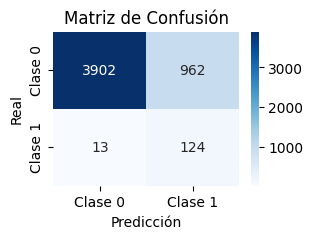


METRICAS RENDIMIENTO DEL MODELO
Accuracy: 0.8050
Precision: 0.1142
Recall: 0.9051
F1-Score: 0.2028
ROC AUC: 0.9251

METRICAS RENDIMIENTO DEL MODELO CON DIFERENTES CORTES
     Modelo  threshold N_obj  precision  recall
0  LightGBM      0.990   250      0.323   0.591
1  LightGBM      0.940   500      0.218   0.796
2  LightGBM      0.780   750      0.160   0.876
3  LightGBM      0.570  1000      0.122   0.890
4  LightGBM      0.400  1250      0.101   0.920


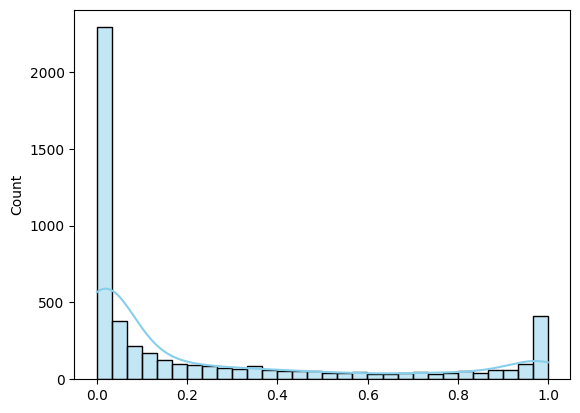

In [122]:
#Modelo LightGBM
# Calcular peso: proporción de negativos / positivos
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos

modelo = lgb.LGBMClassifier(
    n_estimators=100,
    class_weight='balanced',  # alternativo a scale_pos_weight
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 2)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print('\n'+'METRICAS RENDIMIENTO DEL MODELO')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

print('\n'+'METRICAS RENDIMIENTO DEL MODELO CON DIFERENTES CORTES')
Resul_Models = cortes_modelo(y_proba,y_test,'LightGBM')
print(cortes_modelo(y_proba,y_test,'LightGBM'))
#print(print(pd.Series(y_proba).describe()))
sns.histplot(pd.Series(y_proba), bins=30, kde=True, color='skyblue')
plt.show()

#### 4.1.2 Modelo XGBClassifier

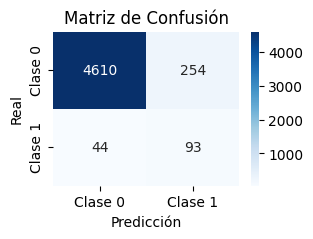


METRICAS RENDIMIENTO DEL MODELO
Accuracy: 0.9404
Precision: 0.2680
Recall: 0.6788
F1-Score: 0.3843
ROC AUC: 0.9274

RENDIMIENTO DEL MODELO CON DIFERENTES CORTES

       Modelo  threshold N_obj  precision  recall
0  modeloxgb      0.700   250      0.331   0.606
1  modeloxgb      0.300   500      0.218   0.796
2  modeloxgb      0.140   750      0.154   0.847
3  modeloxgb      0.080  1000      0.123   0.898
4  modeloxgb      0.040  1250      0.100   0.912


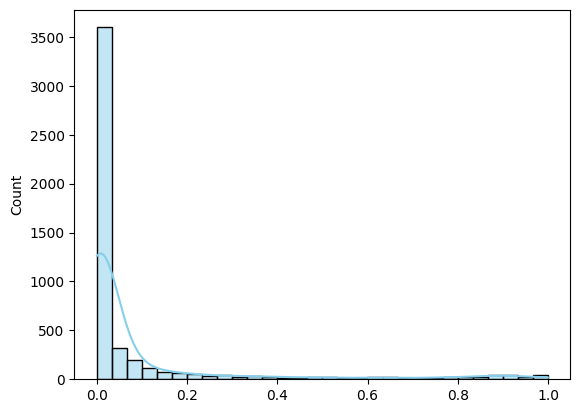

In [123]:
del y_pred, y_proba
modeloxgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    #use_label_encoder=False,
    random_state=42
)
 
modeloxgb.fit(X_train, y_train)

# Realizar predicciones
y_pred = modeloxgb.predict(X_test)
y_proba = modeloxgb.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 2)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print('\n'+'METRICAS RENDIMIENTO DEL MODELO')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Opcional: Ver la importancia de las características

importancias = modeloxgb.feature_importances_

# Crear DataFrame con los nombres de las variables
tabla_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
})

# Ordenar de mayor a menor importancia
tabla_importancia = tabla_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar tabla
#print(tabla_importancia.head(15))
#print(print(pd.Series(y_proba).describe()))
print('\n'+'RENDIMIENTO DEL MODELO CON DIFERENTES CORTES')
Resul_Models = pd.concat([Resul_Models, cortes_modelo(y_proba,y_test,'modeloxgb')], ignore_index=True)
print('\n',cortes_modelo(y_proba,y_test,'modeloxgb'))
sns.histplot(pd.Series(y_proba), bins=30, kde=True, color='skyblue')
plt.show()

### Modelo CatBoostClassifier

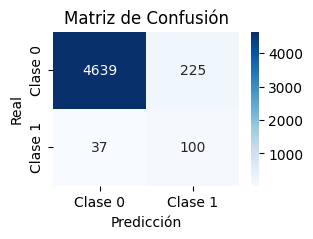


METRICAS RENDIMIENTO DEL MODELO
Accuracy: 0.9476
Precision: 0.3077
Recall: 0.7299
F1-Score: 0.4329
ROC AUC: 0.9499

RENDIMIENTO DEL MODELO CON DIFERENTES CORTES

                Modelo  threshold N_obj  precision  recall
0  CatBoostClassifier      0.670   250      0.359   0.657
1  CatBoostClassifier      0.280   500      0.232   0.847
2  CatBoostClassifier      0.160   750      0.165   0.905
3  CatBoostClassifier      0.100  1000      0.127   0.927
4  CatBoostClassifier      0.070  1250      0.104   0.949


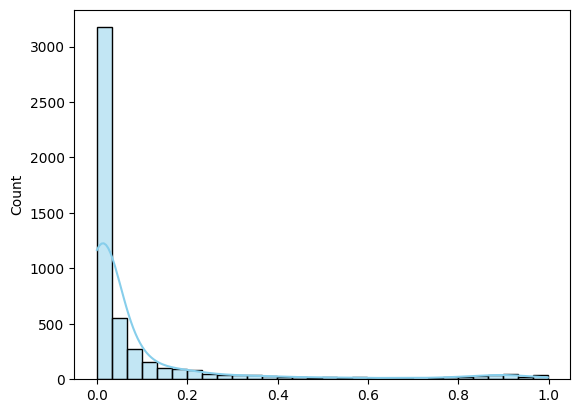

In [124]:
'''CatBoost (Categorical Boosting) es un algoritmo de gradient boosting desarrollado por Yandex (el "Google ruso).**'''

##Equilibrrar las catgorías.
from collections import Counter
conteo = Counter(y_train)
total = sum(conteo.values())
class_weights = {clase: total/conteo[clase] for clase in conteo}


# 3. Crear el modelo CatBoost
modelCAT = CatBoostClassifier(verbose=0,class_weights=class_weights)  # verbose=0 evita que imprima durante el entrenamiento #{0: 1.0130112483464306, 1: 77.85657620041754}

# 4. Entrenar
modelCAT.fit(X_train, y_train)

# 5. Predecir y evaluar
y_pred = modelCAT.predict(X_test)
y_proba = modelCAT.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 2)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print('\n'+'METRICAS RENDIMIENTO DEL MODELO')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


print('\n'+'RENDIMIENTO DEL MODELO CON DIFERENTES CORTES')
Resul_Models = pd.concat([Resul_Models, cortes_modelo(y_proba,y_test,'CatBoostClassifier')], ignore_index=True)
print('\n',cortes_modelo(y_proba,y_test,'CatBoostClassifier'))

sns.histplot(pd.Series(y_proba), bins=30, kde=True, color='skyblue')
plt.show()

## 4.2 Rebalanceo de datos


In [125]:
train_data = pd.concat([X_train, y_train], axis=1)

#BALANCEO DE DATOS 
clase_mayoritaria = train_data[train_data[y.name] == 0]
clase_minoritaria = train_data[train_data[y.name] == 1]

minoritaria_upsampled = resample(
    clase_minoritaria,
    replace=True,
    n_samples=np.round(57.64*len(clase_minoritaria)).astype(int),
    random_state=2025
)

mayoritaria_downsampled = resample(
    clase_mayoritaria,
    replace=False,
    n_samples=np.round(0.75*len(clase_mayoritaria)).astype(int),
    random_state=2025
)

# Unir clases para obtener el nuevo train balanceado
train_balanceado = pd.concat([mayoritaria_downsampled, minoritaria_upsampled])

# Separar X e y nuevamente
X_train_bal = train_balanceado.drop(columns=y.name)
y_train_bal = train_balanceado[y.name]

# Comprobación
print("Distribución original en train:")
print(y_train.value_counts())
print("\nDistribución balanceada:")
print(y_train_bal.value_counts())


NameError: name 'y' is not defined

### 4.2.1 LogisticRegression

In [ ]:
# Definicion del modelo
modelo_logit = LogisticRegression(max_iter=1000)
modelo_logit.fit(X_train_bal, y_train_bal)

# Predecir
y_pred = modelo_logit.predict(X_test)
y_proba = modelo_logit.predict_proba(X_test)[:, 1]

# Matris de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 2)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHURN', 'CHURN'], yticklabels=['No CHURN', 'CHURN'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print('\n'+'METRICAS RENDIMIENTO DEL MODELO')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Resul_Models = pd.concat([Resul_Models, cortes_modelo(y_proba,y_test,'LogisticRegression')], ignore_index=True)
print('\n',cortes_modelo(y_proba,y_test,'LogisticRegression'))

### 4.2.1 RandomForestClassifier

In [ ]:

#Definición del modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_bal, y_train_bal)

# Predecir
y_pred = modelo_rf.predict(X_test)
y_proba = modelo_rf.predict_proba(X_test)[:, 1]

print('\n'+'MATRIZ DE CONFUSIÓN')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 2)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHURN', 'CHURN'], yticklabels=['No CHURN', 'CHURN'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print('\n'+'METRICAS RENDIMIENTO DEL MODELO')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Resul_Models = pd.concat([Resul_Models, cortes_modelo(y_proba,y_test,'RandomForestClassifier')], ignore_index=True)

print('\n',cortes_modelo(y_proba,y_test,'RandomForestClassifier'))

#sns.histplot(y_proba, bins=30, kde=True, color='skyblue')
#plt.show()

### 4.2.3 DecisionTreeClassifier

In [ ]:
del y_proba, y_pred
# Crear y entrenar el modelo
clf = DecisionTreeClassifier(min_samples_leaf=100,random_state=2025)
# Entrenar el modelo
clf.fit(X_train_bal, y_train_bal)

# Predecir
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print('\n'+'MATRIZ DE CONFUSIÓN')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 2)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHURN', 'CHURN'], yticklabels=['No CHURN', 'CHURN'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print('\n'+'METRICAS RENDIMIENTO DEL MODELO')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Resul_Models = pd.concat([Resul_Models, cortes_modelo(y_proba,y_test,'DecisionTreeClassifier')], ignore_index=True)
print('\n',cortes_modelo(y_proba,y_test,'DecisionTreeClassifier'))

sns.histplot(y_proba, bins=30, kde=True, color='skyblue')
plt.show()


In [ ]:
Resul_Models
Resul_Models.to_excel('Resul_Models.xlsx', index=True)
